# Zomato Restaurant

GIT HUB LINK:-•	https://github.com/dsrscientist/dataset4/blob/main/Country-Code.xlsx
•	https://github.com/dsrscientist/dataset4/blob/main/zomato.csv


In [1]:
import pandas as pd

df = pd.read_csv('zomato.csv')

df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


## Checking if dataset contains any null

In [2]:
## Checking if dataset contains any null

nan_values = df.isna()
nan_columns = nan_values.any()

columns_with_nan = df.columns[nan_columns].tolist()
print(columns_with_nan)

['Cuisines']


In [3]:
df1 = pd.read_excel('Country-Code.xlsx')
df1.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [4]:
df2 = pd.merge(df,df1,on='Country Code',how='left')
df2.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [5]:
print('List of counteris the survey is spread accross - ')
for x in pd.unique(df2.Country): print(x)
print()
print('Total number to country', len(pd.unique(df2.Country)))

List of counteris the survey is spread accross - 
Phillipines
Brazil
United States
Australia
Canada
Singapore
UAE
India
Indonesia
New Zealand
United Kingdom
Qatar
South Africa
Sri Lanka
Turkey

Total number to country 15


## Understanding the Rating aggregate, color and text

In [7]:
df3 = df2.groupby(['Aggregate rating','Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
df3
df3

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


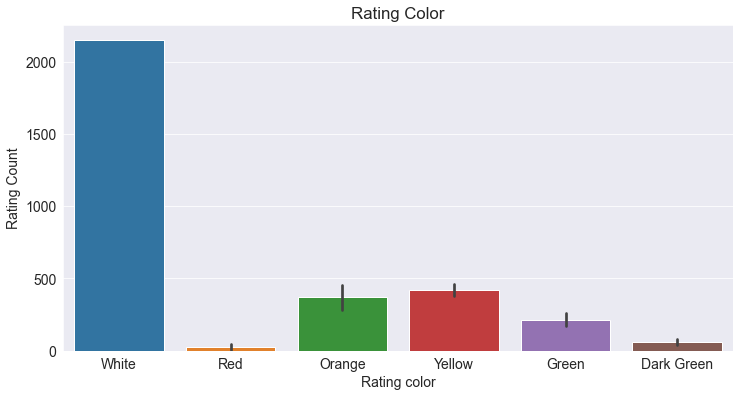

In [8]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

plt.figure(figsize=(12,6))
# plt.xticks(rotation=75)
plt.title('Rating Color')
sns.barplot(x=df3['Rating color'], y=df3['Rating Count']);

In [9]:
No_rating = df2[df2['Rating color']=='White'].groupby('Country').size().reset_index().rename(columns={0:'Rating Count'})
No_rating

,Country,Rating Count
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


## Country and Currency

In [10]:
country_currency = df2[['Country','Currency']].groupby(['Country','Currency']).size().reset_index(name='count').drop('count', axis=1, inplace=False)
country_currency.sort_values('Currency').reset_index(drop=True)

,Country,Currency
0,Phillipines,Botswana Pula(P)
1,Brazil,Brazilian Real(R$)
2,Australia,Dollar($)
3,Canada,Dollar($)
4,Singapore,Dollar($)
5,United States,Dollar($)
6,UAE,Emirati Diram(AED)
7,India,Indian Rupees(Rs.)
8,Indonesia,Indonesian Rupiah(IDR)
9,New Zealand,NewZealand($)


## Online delivery distribution

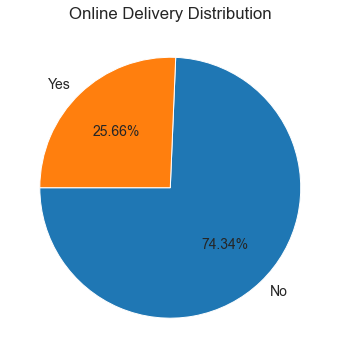

In [11]:
plt.figure(figsize=(12,6))
plt.title('Online Delivery Distribution')
plt.pie(df2['Has Online delivery'].value_counts()/9551*100, labels=df2['Has Online delivery'].value_counts().index, autopct='%1.2f%%', startangle=180);

## Let us try to understand the coverage of city

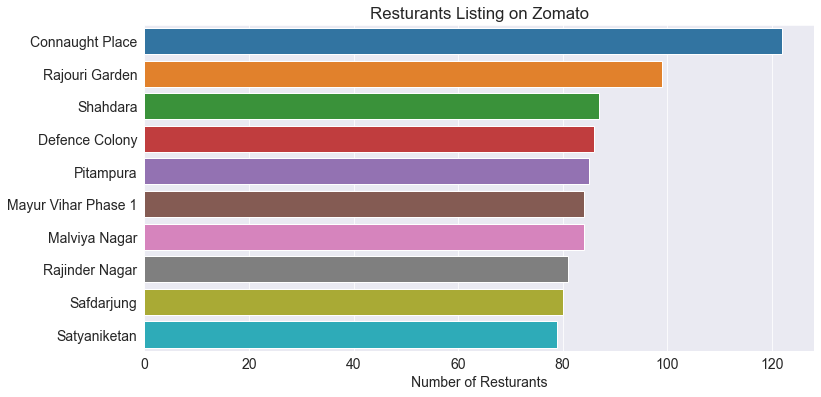

In [13]:
Delhi = df2[(df2.City == 'New Delhi')]
plt.figure(figsize=(12,6))
sns.barplot(x=Delhi.Locality.value_counts().head(10), y=Delhi.Locality.value_counts().head(10).index)

plt.ylabel(None);
plt.xlabel('Number of Resturants')
plt.title('Resturants Listing on Zomato');

In [14]:
# I achieve this by the following steps

## Fetching the resturants having 'Excellent' and 'Very Good' rating
ConnaughtPlace = Delhi[(Delhi.Locality.isin(['Connaught Place'])) & (Delhi['Rating text'].isin(['Excellent','Very Good']))]

ConnaughtPlace = ConnaughtPlace.Cuisines.value_counts().reset_index()

## Extracing all the cuisens in a single list
cuisien = []
for x in ConnaughtPlace['index']: 
  cuisien.append(x)

# cuisien = '[%s]'%', '.join(map(str, cuisien))
cuisien

['North Indian, Chinese, Italian, Continental',
 'North Indian, Chinese, Italian, American, Middle Eastern',
 'Biryani, North Indian, Hyderabadi',
 'North Indian, European',
 'Cafe',
 'Ice Cream',
 'Continental, Mediterranean, Italian, North Indian',
 'North Indian, Afghani, Mughlai',
 'Chinese',
 'North Indian',
 'Continental, North Indian, Italian, Asian',
 'Asian, North Indian',
 'North Indian, Continental',
 'North Indian, Italian, Asian, American',
 'Bakery, Desserts, Fast Food',
 'North Indian, European, Asian, Mediterranean',
 'Continental, Mexican, Burger, American, Pizza, Tex-Mex',
 'Continental, Italian, Asian, Indian',
 'North Indian, Chinese',
 'Modern Indian',
 'Continental, North Indian, Chinese, Mediterranean',
 'Italian, Mexican, Continental, North Indian, Finger Food',
 'South Indian',
 'Biryani, Hyderabadi',
 'Fast Food, American, Burger',
 'North Indian, Chinese, Continental, Italian',
 'Continental, American, Asian, North Indian',
 'Japanese',
 'Healthy Food, Contin

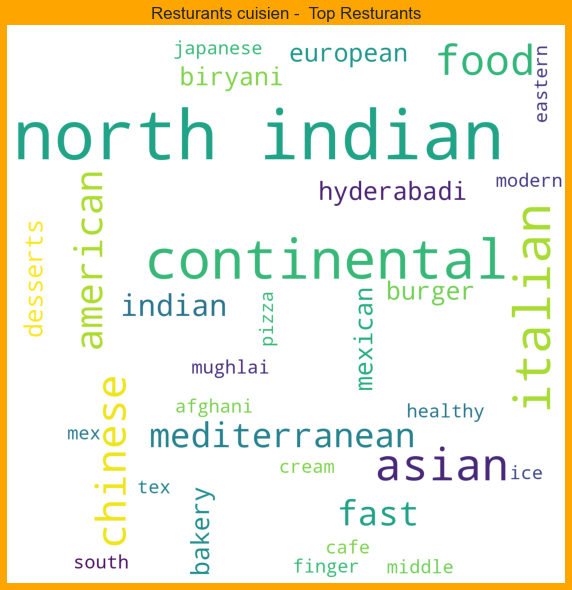

In [15]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
  
comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in cuisien:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 1500, height = 1500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = 'orange')
plt.title('Resturants cuisien -  Top Resturants')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

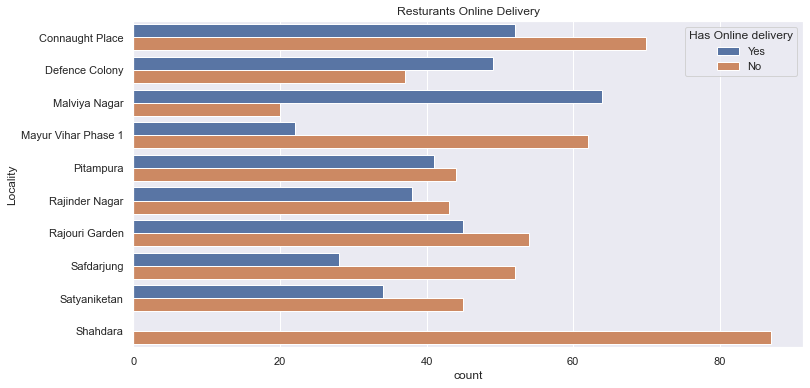

In [16]:
top_locality = Delhi.Locality.value_counts().head(10)
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,6))
ax = sns.countplot(y= "Locality", hue="Has Online delivery", data=Delhi[Delhi.Locality.isin(top_locality.index)])
plt.title('Resturants Online Delivery');

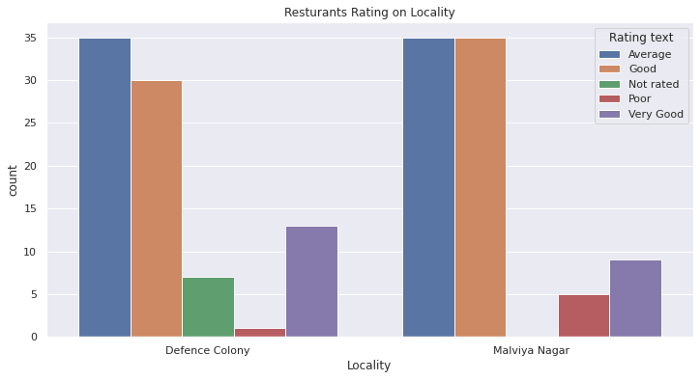

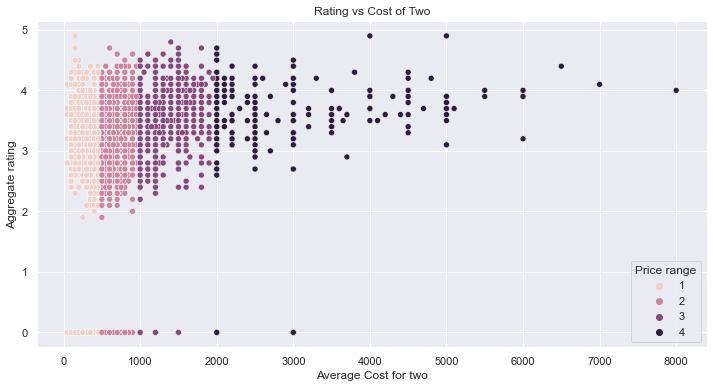

In [29]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="Average Cost for two", y="Aggregate rating", hue='Price range', data=Delhi)

plt.xlabel("Average Cost for two")
plt.ylabel("Aggregate rating")
plt.title('Rating vs Cost of Two');

## Q6: Location of Highly rated restaurants across New Delhi

In [18]:
Delhi['Rating text'].value_counts()

Average      2495
Not rated    1425
Good         1128
Very Good     300
Poor           97
Excellent      28
Name: Rating text, dtype: int64

###  1: Breakfast and Coffee locations

In [20]:
types = {
    "Breakfast and Coffee" : ["Cafe Coffee Day", "Starbucks", "Barista", "Costa Coffee", "Chaayos", "Dunkin' Donuts"],
    "American": ["Domino's Pizza", "McDonald's", "Burger King", "Subway", "Dunkin' Donuts", "Pizza Hut"],
    "Ice Creams and Shakes": ["Keventers", "Giani", "Giani's", "Starbucks", "Baskin Robbins", "Nirula's Ice Cream"]
}

breakfast = Delhi[Delhi['Restaurant Name'].isin(types['Breakfast and Coffee'])]
american = Delhi[Delhi['Restaurant Name'].isin(types['American'])]
ice_cream = Delhi[Delhi['Restaurant Name'].isin(types['Ice Creams and Shakes'])]

In [35]:
breakfast = breakfast[['Restaurant Name','Aggregate rating']].groupby('Restaurant Name').mean().reset_index().sort_values('Aggregate rating',ascending=False).reset_index()
breakfast.drop("index",axis=1)


,Restaurant Name,Aggregate rating
0,Chaayos,3.812500
1,Starbucks,3.750000
2,Costa Coffee,3.450000
3,Barista,3.325000
4,Dunkin' Donuts,3.300000
5,Cafe Coffee Day,2.573684


### 2: Fast Food Restaurants

In [23]:
american = american[['Restaurant Name','Aggregate rating']].groupby('Restaurant Name').mean().reset_index().sort_values('Aggregate rating',ascending=False)
american

,Restaurant Name,Aggregate rating
0,Burger King,3.477778
3,McDonald's,3.445455
2,Dunkin' Donuts,3.300000
4,Pizza Hut,3.158333
5,Subway,3.047368
1,Domino's Pizza,2.794545


### 3: Ice Cream Parlors

In [25]:
ice_cream = ice_cream[['Restaurant Name','Aggregate rating']].groupby('Restaurant Name').mean().reset_index().sort_values('Aggregate rating',ascending=False)
ice_cream

,Restaurant Name,Aggregate rating
5,Starbucks,3.750000
2,Giani's,3.011765
3,Keventers,2.983333
0,Baskin Robbins,2.769231
1,Giani,2.675000
4,Nirula's Ice Cream,2.400000


2 try 

In [1]:
import numpy as np #NumPy is a general-purpose array-processing package.
import pandas as pd #It contains high-level data structures and manipulation tools designed to make data analysis fast and easy.
import matplotlib.pyplot as plt #It is a Plotting Library
import seaborn as sns #Seaborn is a Python data visualization library based on matplotlib.
from sklearn.linear_model import LogisticRegression #Logistic Regression is a Machine Learning classification algorithm
from sklearn.linear_model import LinearRegression #Linear Regression is a Machine Learning classification algorithm
from sklearn.model_selection import train_test_split #Splitting of Dataset
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
zomato_orgnl=pd.read_csv("zomato .csv")
zomato_orgnl.head()

,Restaurant ID,Restaurant Name,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
zomato=zomato_orgnl.drop(['Restaurant ID','Currency','Has Table booking'],axis=1) 


In [4]:
zomato=zomato_orgnl.drop(['Restaurant ID','Currency','Has Table booking'],axis=1) 


In [5]:
zomato.duplicated().sum()
zomato.drop_duplicates(inplace=True)

In [6]:
zomato.isnull().sum()
zomato.dropna(how='any',inplace=True)
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2195 entries, 0 to 2197
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       2195 non-null   object 
 1   Cuisines              2195 non-null   object 
 2   Average Cost for two  2195 non-null   int64  
 3   Has Online delivery   2195 non-null   object 
 4   Is delivering now     2195 non-null   object 
 5   Switch to order menu  2195 non-null   object 
 6   Price range           2195 non-null   int64  
 7   Aggregate rating      2195 non-null   float64
 8   Rating color          2195 non-null   object 
 9   Rating text           2195 non-null   object 
 10  Votes                 2195 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 205.8+ KB


In [7]:
zomato.columns
zomato = zomato.rename(columns={'Restaurant ID':'Has Online delivery','Switch to order menu':'Aggregate rating',
                                  'Rating color':'Votes'})
zomato.columns

Index(['Restaurant Name', 'Cuisines', 'Average Cost for two',
       'Has Online delivery', 'Is delivering now', 'Aggregate rating',
       'Price range', 'Aggregate rating', 'Votes', 'Rating text', 'Votes'],
      dtype='object')

In [8]:
zomato['Average Cost for two'] = zomato['Average Cost for two'].astype(str)
zomato['Average Cost for two'] = zomato['Average Cost for two'].apply(lambda x: x.replace(',','.'))
zomato['Average Cost for two'] = zomato['Average Cost for two'].astype(float)
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2195 entries, 0 to 2197
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       2195 non-null   object 
 1   Cuisines              2195 non-null   object 
 2   Average Cost for two  2195 non-null   float64
 3   Has Online delivery   2195 non-null   object 
 4   Is delivering now     2195 non-null   object 
 5   Aggregate rating      2195 non-null   object 
 6   Price range           2195 non-null   int64  
 7   Aggregate rating      2195 non-null   float64
 8   Votes                 2195 non-null   object 
 9   Rating text           2195 non-null   object 
 10  Votes                 2195 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 205.8+ KB


In [9]:
import pandas as pd

#Linear Algebra
import numpy as np

#Data Visualization
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

#algorithms
import sklearn 
from sklearn import model_selection 
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression,RidgeCV
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder

from sklearn.model_selection import train_test_split,cross_val_predict

#datasets
from sklearn import datasets


import warnings
warnings.filterwarnings('ignore')

In [10]:
zomato=pd.read_csv('zomato .csv')

zomato.head()

,Restaurant ID,Restaurant Name,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [11]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2198 entries, 0 to 2197
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         2198 non-null   int64  
 1   Restaurant Name       2198 non-null   object 
 2   Cuisines              2198 non-null   object 
 3   Average Cost for two  2198 non-null   int64  
 4   Currency              2198 non-null   object 
 5   Has Table booking     2198 non-null   object 
 6   Has Online delivery   2198 non-null   object 
 7   Is delivering now     2198 non-null   object 
 8   Switch to order menu  2198 non-null   object 
 9   Price range           2198 non-null   int64  
 10  Aggregate rating      2198 non-null   float64
 11  Rating color          2198 non-null   object 
 12  Rating text           2198 non-null   object 
 13  Votes                 2198 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 240.5+ KB


In [12]:
zomato.describe()

,Restaurant ID,Average Cost for two,Price range,Aggregate rating,Votes
count,2.198000e+03,2198.000000,2198.000000,2198.000000,2198.000000
mean,1.061564e+07,534.541856,2.052775,3.121565,231.792084
std,8.414918e+06,583.948974,0.949302,1.377850,545.325759
min,1.570000e+02,0.000000,1.000000,0.000000,0.000000
25%,3.082892e+05,100.000000,1.000000,2.900000,13.000000
50%,1.728879e+07,400.000000,2.000000,3.500000,60.000000
75%,1.829147e+07,700.000000,3.000000,4.000000,231.000000
max,1.850065e+07,6000.000000,4.000000,4.900000,10934.000000


In [13]:
zomato.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [14]:
zomato.apply(lambda x: len(x.unique()))

zomato.apply(lambda x: len(x.unique()))


Restaurant ID           2198
Restaurant Name         1936
Cuisines                 808
Average Cost for two      85
Currency                   5
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          32
Rating color               6
Rating text                6
Votes                    642
dtype: int64

In [15]:
categorical_columns = [x for x in zomato.dtypes.index if zomato.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['Restaurant ID','Price range','Price range']]
#Print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print (zomato[col].value_counts())


Frequency of Categories for varible Restaurant Name
Restaurant Name
Subway               13
Domino's Pizza       11
Cafe Coffee Day      11
McDonald's            8
Pind Balluchi         8
                     ..
Hot Stuff             1
Eat On                1
Cafe El Chico         1
The Tamarind Tree     1
Bal Gopal             1
Name: count, Length: 1936, dtype: int64

Frequency of Categories for varible Cuisines
Cuisines
North Indian                           136
North Indian, Chinese                  103
North Indian, Mughlai                   65
Cafe                                    62
Chinese                                 57
                                      ... 
Coffee and Tea, Desserts, Beverages      1
Sandwich, Sushi, Tapas                   1
Burger, Greek, Sandwich                  1
Turkish, Arabian, Middle Eastern         1
North Indian, Italian, Continental       1
Name: count, Length: 808, dtype: int64

Frequency of Categories for varible Currency
Currency
India

# Imputing Missing Values


In [16]:
zomato['Aggregate rating'].value_counts()


Aggregate rating
0.0    310
3.6    122
3.8    120
3.4    111
4.1    111
3.7    109
3.2    104
3.5    101
4.0    100
3.9     98
3.3     94
3.1     90
4.2     87
3.0     84
4.3     78
4.4     67
2.9     65
2.8     60
4.5     51
4.6     45
2.7     45
4.9     30
2.6     27
2.4     20
4.7     18
4.8     17
2.5     15
2.2      8
2.3      6
2.1      3
1.8      1
2.0      1
Name: count, dtype: int64

In [17]:
zomato['Aggregate rating'].isnull().sum()

0

In [18]:
zomato['Aggregate rating'].fillna('Medium',inplace=True)


In [19]:
zomato['Aggregate rating'].isnull().sum()


0

In [20]:
zomato['Average Cost for two'].isnull().sum()


0

In [21]:
zomato['Average Cost for two'].fillna(zomato['Average Cost for two'].mean(),inplace=True)


In [22]:
zomato['Average Cost for two'].isnull().sum()


0

<AxesSubplot:>

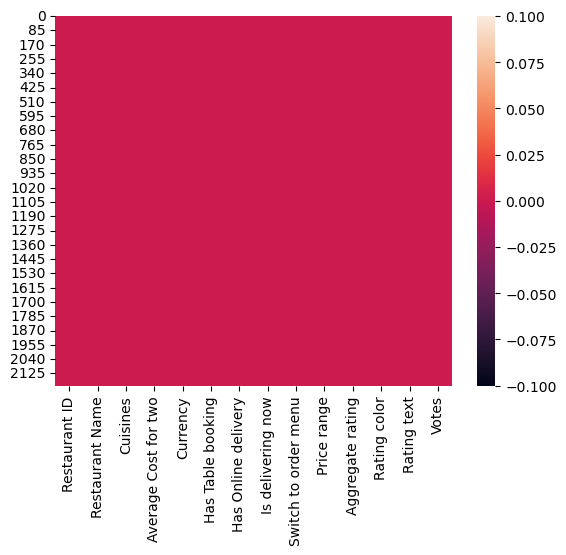

In [23]:
sns.heatmap(zomato.isnull())


In [24]:
zomato['Restaurant ID'].fillna(zomato['Restaurant ID'].median(),inplace=True)


In [25]:
zomato['Price range'].describe()


count    2198.000000
mean        2.052775
std         0.949302
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: Price range, dtype: float64

In [26]:
zomato['Price range'].value_counts()


Price range
2    821
1    732
3    442
4    203
Name: count, dtype: int64

In [27]:
zomato['rating']=2013-zomato['Aggregate rating']
zomato['rating'].value_counts()

rating
2013.0    310
2009.4    122
2009.2    120
2009.6    111
2008.9    111
2009.3    109
2009.8    104
2009.5    101
2009.0    100
2009.1     98
2009.7     94
2009.9     90
2008.8     87
2010.0     84
2008.7     78
2008.6     67
2010.1     65
2010.2     60
2008.5     51
2008.4     45
2010.3     45
2008.1     30
2010.4     27
2010.6     20
2008.3     18
2008.2     17
2010.5     15
2010.8      8
2010.7      6
2010.9      3
2011.2      1
2011.0      1
Name: count, dtype: int64

In [28]:
print('Original Categories:')
print(zomato['Rating text'].value_counts())

Original Categories:
Rating text
Average      695
Good         550
Very Good    443
Not rated    310
Excellent    161
Poor          39
Name: count, dtype: int64


In [29]:
print('\nModified Categories:')
zomato['Rating text'] = zomato['Rating text'].replace({'Ave':'Average',
                                                             'VG':'Very Good',})
zomato['Rating text'].value_counts()


Modified Categories:


Rating text
Average      695
Good         550
Very Good    443
Not rated    310
Excellent    161
Poor          39
Name: count, dtype: int64

In [30]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
zomato['Rating'] = le.fit_transform(zomato['Rating text'])
var_mod = ['Cuisines','Average Cost for two','Currency','Has Table booking','Has Online delivery','Is delivering now','Aggregate rating']
le = LabelEncoder()
for i in var_mod:
    zomato[i] = le.fit_transform(zomato[i])

In [31]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2198 entries, 0 to 2197
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         2198 non-null   int64  
 1   Restaurant Name       2198 non-null   object 
 2   Cuisines              2198 non-null   int32  
 3   Average Cost for two  2198 non-null   int64  
 4   Currency              2198 non-null   int32  
 5   Has Table booking     2198 non-null   int32  
 6   Has Online delivery   2198 non-null   int32  
 7   Is delivering now     2198 non-null   int32  
 8   Switch to order menu  2198 non-null   object 
 9   Price range           2198 non-null   int64  
 10  Aggregate rating      2198 non-null   int64  
 11  Rating color          2198 non-null   object 
 12  Rating text           2198 non-null   object 
 13  Votes                 2198 non-null   int64  
 14  rating                2198 non-null   float64
 15  Rating               

In [32]:
zomato.drop('Cuisines',axis=1,inplace=True)


In [33]:
zomato.drop('Currency',axis=1,inplace=True)


In [34]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2198 entries, 0 to 2197
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         2198 non-null   int64  
 1   Restaurant Name       2198 non-null   object 
 2   Average Cost for two  2198 non-null   int64  
 3   Has Table booking     2198 non-null   int32  
 4   Has Online delivery   2198 non-null   int32  
 5   Is delivering now     2198 non-null   int32  
 6   Switch to order menu  2198 non-null   object 
 7   Price range           2198 non-null   int64  
 8   Aggregate rating      2198 non-null   int64  
 9   Rating color          2198 non-null   object 
 10  Rating text           2198 non-null   object 
 11  Votes                 2198 non-null   int64  
 12  rating                2198 non-null   float64
 13  Rating                2198 non-null   int32  
dtypes: float64(1), int32(4), int64(5), object(4)
memory usage: 206.2+ KB


# Check Distribution of Skewness


In [35]:
pip install --upgrade seaborn pandas


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [36]:
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
warnings.filterwarnings('ignore') # hide annoying warnings
style.use('fivethirtyeight') 

In [37]:
df=pd.read_csv('zomato .csv')


In [38]:
df.head()


,Restaurant ID,Restaurant Name,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


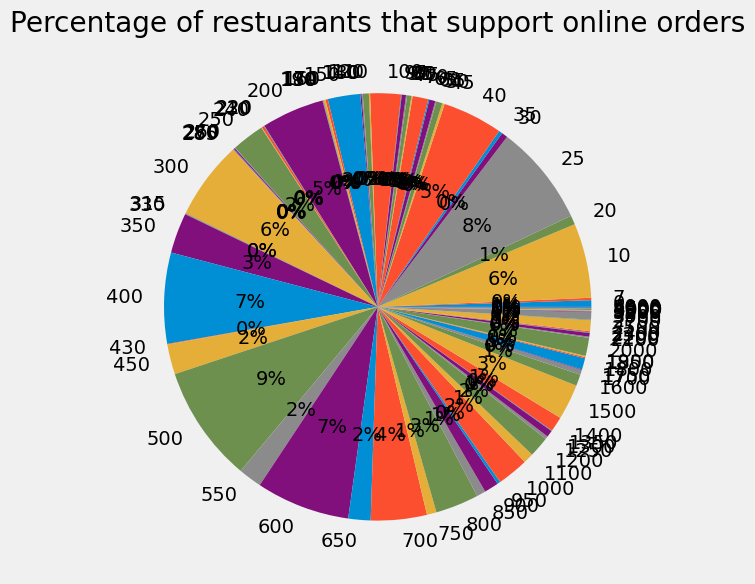

In [39]:
q6=df.groupby('Average Cost for two')['Average Cost for two'].count()/len(df)
q6.plot(kind='pie',autopct='%1.0f%%',label='',figsize=(6,8));
plt.title("Percentage of restuarants that support online orders")
plt.tight_layout()

In [40]:
df['Cuisines'].value_counts()


Cuisines
North Indian                           136
North Indian, Chinese                  103
North Indian, Mughlai                   65
Cafe                                    62
Chinese                                 57
                                      ... 
Coffee and Tea, Desserts, Beverages      1
Sandwich, Sushi, Tapas                   1
Burger, Greek, Sandwich                  1
Turkish, Arabian, Middle Eastern         1
North Indian, Italian, Continental       1
Name: count, Length: 808, dtype: int64

In [41]:
df["Cuisines"] = df["Cuisines"].replace("NEW", np.nan) # Replace useless values with nan


In [42]:
df["Cuisines"] = df["Cuisines"].replace("-", np.nan)


In [43]:
def remove_5(string: str):
    if type(string)==str:
        new_string=string.split('/')[0]
        return new_string
    return string

In [44]:
df['Cuisines']=df['Cuisines'].apply(remove_5)


In [45]:
# Assuming your DataFrame is named 'df' and 'Cuisines' is a column containing comma-separated cuisine types

# Split the cuisines and create new columns for each cuisine
cuisine_types = df['Cuisines'].str.split(', ', expand=True)

# Iterate through unique cuisine types and create binary columns
unique_cuisines = set(cuisine_types.values.ravel())
for cuisine in unique_cuisines:
    df[cuisine] = cuisine_types.apply(lambda row: 1 if cuisine in row.values else 0, axis=1)

# Now, you have binary columns for each cuisine type


In [46]:
df['Price range'].head() # First 5 entries


0    3
1    3
2    4
3    4
4    4
Name: Price range, dtype: int64

In [47]:
df['Price range'].value_counts() # Most common values


Price range
2    821
1    732
3    442
4    203
Name: count, dtype: int64

<AxesSubplot:ylabel='Price range'>

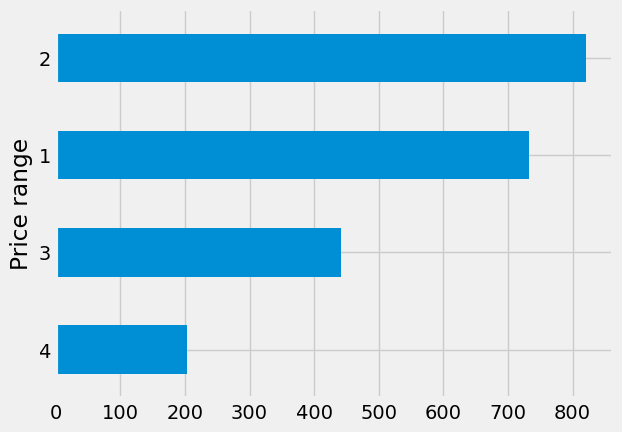

In [48]:
df['Price range'].value_counts()[0:10].sort_values().plot(kind='barh')

In [49]:
df.describe()


,Restaurant ID,Average Cost for two,Price range,Aggregate rating,Votes,International,Teriyaki,Afghani,Charcoal Grill,Spanish,...,Hyderabadi,Southern,Mexican,Maharashtrian,Singaporean,Goan,Coffee and Tea,Mithai,Western,Korean
count,2.198000e+03,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000,...,2198.000000,2198.000000,2198.000000,2198.000000,2198.00000,2198.000000,2198.000000,2198.000000,2198.000000,2198.000000
mean,1.061564e+07,534.541856,2.052775,3.121565,231.792084,0.007279,0.000910,0.002275,0.000910,0.003640,...,0.002730,0.010919,0.034122,0.000455,0.00182,0.006369,0.007279,0.027753,0.000455,0.004095
std,8.414918e+06,583.948974,0.949302,1.377850,545.325759,0.085027,0.030158,0.047651,0.030158,0.060234,...,0.052188,0.103946,0.181584,0.021330,0.04263,0.079572,0.085027,0.164300,0.021330,0.063873
min,1.570000e+02,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.082892e+05,100.000000,1.000000,2.900000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.728879e+07,400.000000,2.000000,3.500000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.829147e+07,700.000000,3.000000,4.000000,231.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.850065e+07,6000.000000,4.000000,4.900000,10934.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2198 entries, 0 to 2197
Columns: 132 entries, Restaurant ID to Korean
dtypes: float64(1), int64(122), object(9)
memory usage: 2.2+ MB


In [51]:
import pandas as pd

df = pd.read_csv('zomato .csv')

df.head(2)

,Restaurant ID,Restaurant Name,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [52]:
nan_values = df.isna()
nan_columns = nan_values.any()

columns_with_nan = df.columns[nan_columns].tolist()
print(columns_with_nan)

[]
